<a href="https://colab.research.google.com/github/WaithiraHawi/Customer-Churn/blob/main/NaivesBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/content/Bank Customer Churn Prediction.csv")
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape[0]

10000

In [4]:
data.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [6]:
le = preprocessing.LabelEncoder()
data['credit_score'] = le.fit_transform(data['credit_score'])

In [7]:
label_mapping = {}

categorical_columns = ['gender', 'balance', 'country', 'credit_score', 'products_number']

for col in categorical_columns:
    unique_categories = data[col].unique()

    label_mapping[col] = {cat: label for label, cat in enumerate(unique_categories)}

    data[col] = data[col].map(label_mapping[col])

data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,0,0,0,42,2,0,0,1,1,101348.88,1
1,15647311,1,1,0,41,1,1,0,0,1,112542.58,0
2,15619304,2,0,0,42,8,2,1,1,0,113931.57,1
3,15701354,3,0,0,39,1,0,2,0,0,93826.63,0
4,15737888,4,1,0,43,2,3,0,1,1,79084.10,0


In [11]:
# Bayesian Algorithm
data_encoded = pd.get_dummies(data, columns=['country', 'gender', 'products_number', 'credit_card', 'active_member'])

X = data_encoded.drop(['customer_id', 'churn'], axis=1)  # Features
y = data_encoded['churn']  # Target variable

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.79


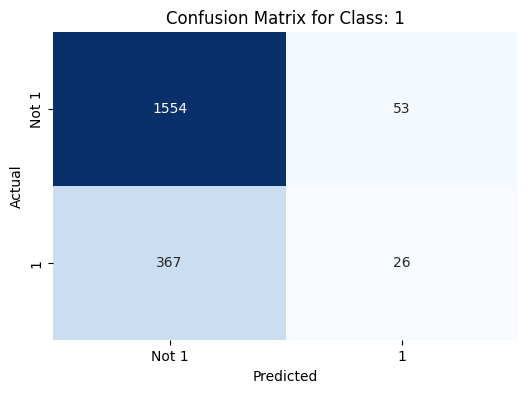

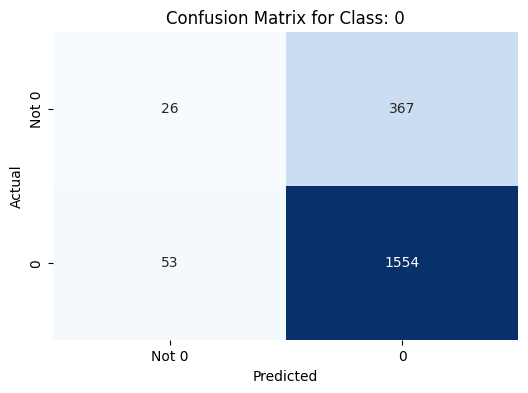

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

classes = data_encoded['churn'].unique()

for class_label in classes:
    y_test_class = (y_test == class_label)
    y_pred_class = (y_pred == class_label)

    conf_matrix = confusion_matrix(y_test_class, y_pred_class)

    class_label_str = str(class_label)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Not ' + class_label_str, class_label_str],
                yticklabels=['Not ' + class_label_str, class_label_str])
    plt.title('Confusion Matrix for Class: ' + class_label_str)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [19]:
# Kmeans clustering
data_encoded = pd.get_dummies(data.drop(['customer_id'], axis=1))

k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_encoded)
clusters = kmeans.labels_
print(clusters)

[2 2 2 ... 1 2 1]


In [20]:
data['cluster'] = clusters

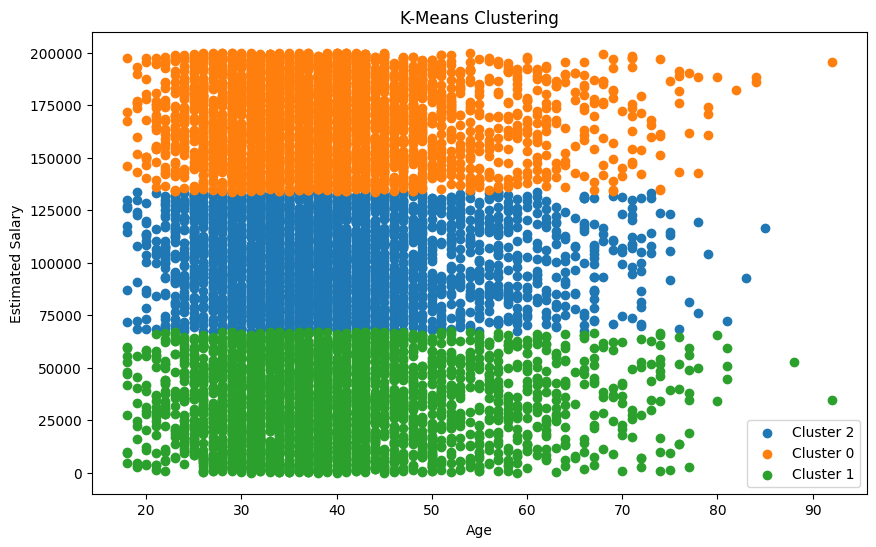

In [22]:
plt.figure(figsize=(10, 6))
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['age'], cluster_data['estimated_salary'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Train and evaluate Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Train and evaluate XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate performance
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

print("XGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print(classification_report(y_test, xgb_y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:34:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Classifier:
Accuracy: 0.862
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

XGBoost Classifier:
Accuracy: 0.851
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.66      0.49      0.57       393

    accuracy                           0.85      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000

